In [1]:
!pip install pycountry

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pycountry

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [3]:
%load_ext google.colab.data_table

In [4]:
co2 = pd.read_csv("/content/co2_emissions.csv")

In [ ]:
co2

In [ ]:
country_names = [country.name.lower() for country in pycountry.countries]
country_mask = co2['Country'].str.lower().isin(country_names)
co2_new = co2[country_mask].reset_index(drop=True)
co2_new

In [ ]:
co2_biggest_5 = co2_new.nlargest(5,'2021')
co2_biggest_5 = co2_biggest_5['Country'].tolist()
co2_biggest_5

In [ ]:
co2_graph1 = co2_new.loc[co2_new['Country'].isin(co2_biggest_5)]
co2_graph1

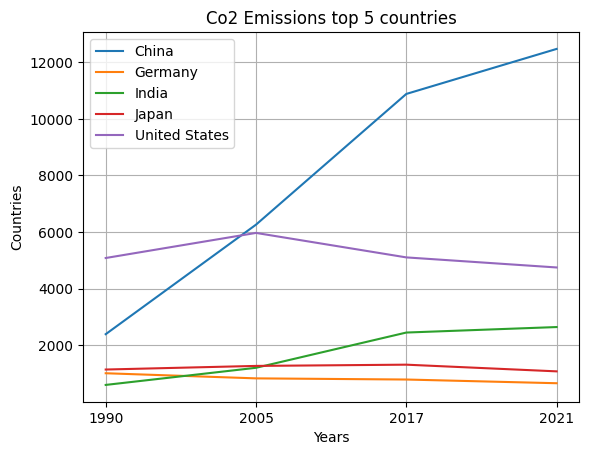

In [9]:
fig, ax = plt.subplots()

years = co2_graph1.columns[1:]

for index, row in co2_graph1.iterrows():
  plt.plot(years, row[1:], label=row[0])

ax.set(xlabel= 'Years', ylabel= 'Countries', title= 'Co2 Emissions top 5 countries')
ax.legend()
ax.grid()

plt.show()

In [ ]:
co2_new
co2_graph2_filter = co2_new[co2_new['1990'] > 5]
co2_filtered = co2_graph2_filter.reset_index(drop=True)
co2_filtered

In [11]:
RC1990_2005 = ((co2_filtered['2005'] - co2_filtered['1990']) / co2_filtered['1990']) * 100
RC2005_2017 = ((co2_filtered['2017'] - co2_filtered['2005']) / co2_filtered['2005']) * 100
RC2017_2021 = ((co2_filtered['2021'] - co2_filtered['2017']) / co2_filtered['2017']) * 100

In [ ]:
co2_filtered['RC1990 %'] = 100
co2_filtered['RC1990_2005 %'] = RC1990_2005.round(2)
co2_filtered['RC2005_2017 %'] = RC2005_2017.round(2)
co2_filtered['RC2017_2021 %'] = RC2017_2021.round(2)
co2_filtered

In [ ]:
co2_sorted = co2_filtered.sort_values(by=['RC1990_2005 %','RC2005_2017 %'])
co2_sorted = co2_sorted.reset_index(drop=True)
co2_sorted


In [14]:
co2_highest = co2_sorted.nlargest(3,'RC1990_2005 %')
co2_lowest = co2_sorted.nsmallest(3,'RC1990_2005 %')

In [19]:
co2_highest = co2_highest[['Country','RC1990 %', 'RC1990_2005 %','RC2005_2017 %','RC2017_2021 %']]
co2_highest

,Country,RC1990 %,RC1990_2005 %,RC2005_2017 %,RC2017_2021 %
86,Yemen,100,216.07,-42.56,-3.62
85,Malaysia,100,208.15,41.80,-2.79
84,Bangladesh,100,180.03,117.71,26.40


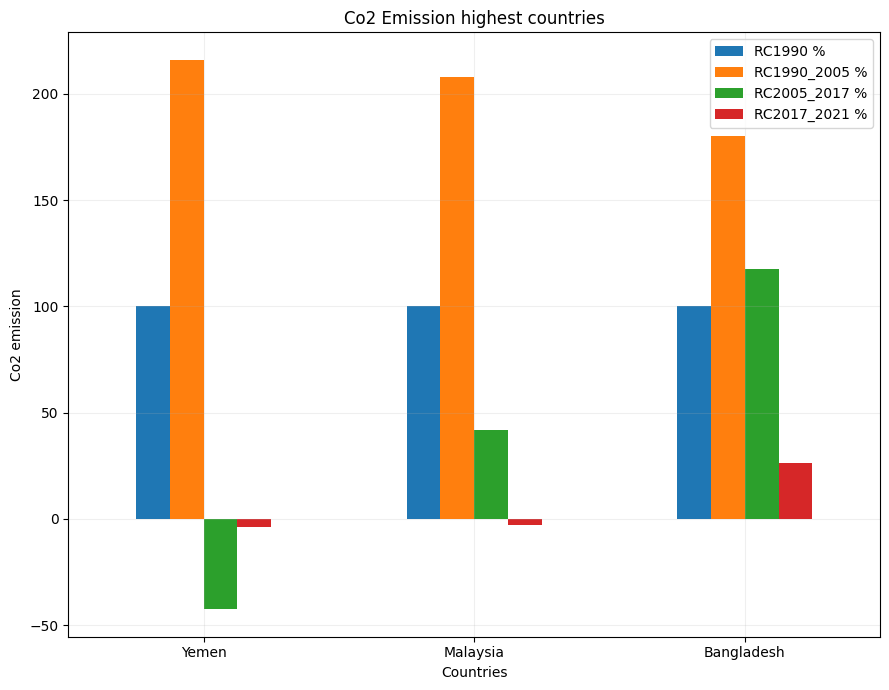

In [34]:
#co2_highest.set_index('Country', inplace = True)

num_bars = 4
fig_width = max(9, num_bars *2)
fig_height = 7

co2_highest.plot(kind='bar', figsize = (fig_width, fig_height))

plt.xlabel('Countries')
plt.ylabel('Co2 emission')
plt.title('Co2 Emission highest countries')
plt.xticks(rotation=0)

plt.legend()
plt.grid(alpha=0.2)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

In [ ]:
co2_lowest = co2_lowest[['Country','RC1990 %', 'RC1990_2005 %','RC2005_2017 %','RC2017_2021 %']]
co2_lowest

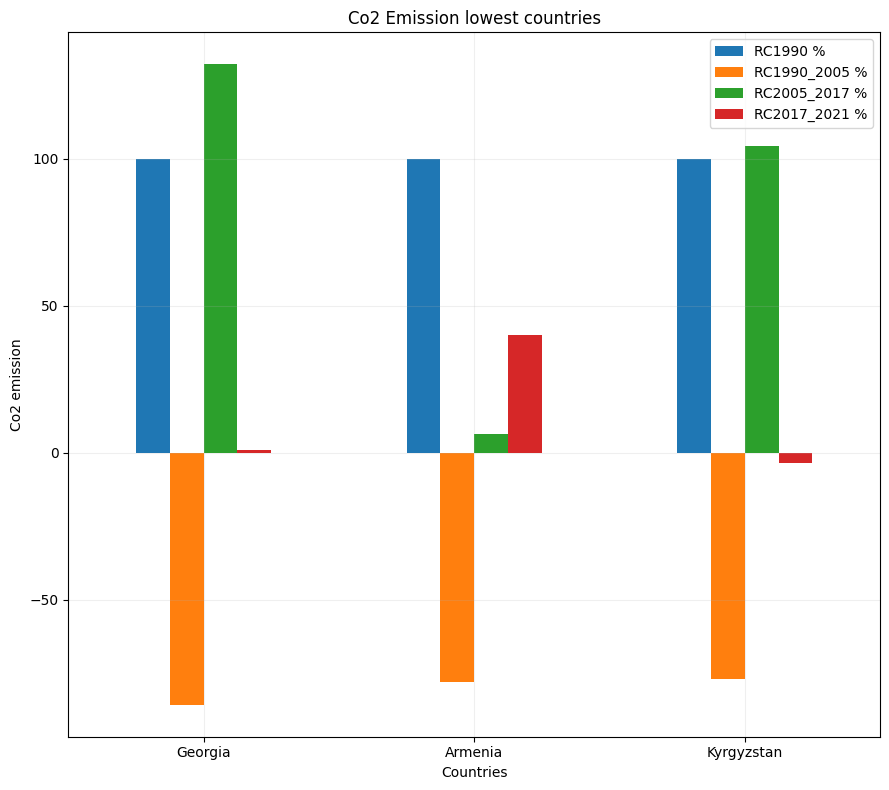

In [36]:
#co2_lowest.set_index('Country', inplace = True)
num_bars = 4
fig_width = max(9, num_bars *2)
fig_height = 8

co2_lowest.plot(kind='bar', figsize = (fig_width, fig_height))

plt.xlabel('Countries')
plt.ylabel('Co2 emission')
plt.title('Co2 Emission lowest countries')
plt.xticks(rotation=0)

plt.legend()
plt.grid(alpha=0.2)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()